# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# import numpy and pandas

%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd
import re

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [4]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [5]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [10]:
# Your code here:

def clean_value(row):
    if 'M' in row:
        return float(re.sub('[^0-9,.]', '', row))
    else:
        return float(re.sub('[^0-9]', '', row))/1000

fifa['ValueNumeric'] = fifa['Value'].apply(clean_value)

fifa['ValueNumeric'] = fifa['ValueNumeric'].astype(float)
fifa['ValueNumeric'].sum()

43891.54

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
# Your code here:

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

In [11]:
formula = 'ValueNumeric ~C(fifa["Position"]) + C(fifa["Preferred Foot"])'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Position""])",26.0,16496.092002,634.465077,20.791849,5.031960e-96
"C(fifa[""Preferred Foot""])",1.0,234.162243,234.162243,7.673655,5.608990e-03
Residual,18119.0,552902.860021,30.515087,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:

Ambas variables estan influenciadas en el resultado de la variable dependiente

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [12]:
# Your code here:

formula = 'ValueNumeric ~C(fifa["Nationality"])'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Nationality""])",163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

In [13]:
"Se rechaza la hipotesis nula por diferencias en nacionalidad y valor del jugador"

'Se rechaza la hipotesis nula por diferencias en nacionalidad y valor del jugador'

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [23]:
# Your code here:

fifa.info()

fifa.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           17918 non-null  object 
 1   Age            17918 non-null  int64  
 2   Nationality    17918 non-null  object 
 3   Overall        17918 non-null  int64  
 4   Potential      17918 non-null  int64  
 5   Club           17918 non-null  object 
 6   Value          17918 non-null  object 
 7   PreferredFoot  17918 non-null  object 
 8   Position       17918 non-null  object 
 9   Weak Foot      17918 non-null  float64
 10  Acceleration   17918 non-null  float64
 11  SprintSpeed    17918 non-null  float64
 12  Stamina        17918 non-null  float64
 13  Strength       17918 non-null  float64
 14  LongShots      17918 non-null  float64
 15  Aggression     17918 non-null  float64
 16  Interceptions  17918 non-null  float64
 17  Positioning    17918 non-null  float64
 18  Vision

,Age,Overall,Potential,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,newvalue
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000
mean,25.105257,66.236801,71.329334,2.947260,64.601518,64.720672,63.205994,65.323697,47.130316,55.879060,46.690870,49.995758,53.448934,48.544480,268.352232
std,4.675372,6.929243,6.144098,0.660106,14.947197,14.666098,15.892897,12.552242,19.251517,17.354347,20.691841,19.521104,14.119193,15.691563,290.149881
min,16.000000,46.000000,48.000000,1.000000,12.000000,12.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000,57.000000,57.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,4.900000
50%,25.000000,66.000000,71.000000,3.000000,67.000000,67.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,160.000000
75%,28.000000,71.000000,75.000000,3.000000,75.000000,75.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,475.000000
max,45.000000,94.000000,95.000000,5.000000,97.000000,96.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,975.000000


In [14]:
fifa2 = fifa.copy()
fifa2.dropna(inplace=True)
fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17918 non-null  object 
 1   Age             17918 non-null  int64  
 2   Nationality     17918 non-null  object 
 3   Overall         17918 non-null  int64  
 4   Potential       17918 non-null  int64  
 5   Club            17918 non-null  object 
 6   Value           17918 non-null  object 
 7   Preferred Foot  17918 non-null  object 
 8   Position        17918 non-null  object 
 9   Weak Foot       17918 non-null  float64
 10  Acceleration    17918 non-null  float64
 11  SprintSpeed     17918 non-null  float64
 12  Stamina         17918 non-null  float64
 13  Strength        17918 non-null  float64
 14  LongShots       17918 non-null  float64
 15  Aggression      17918 non-null  float64
 16  Interceptions   17918 non-null  float64
 17  Positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [15]:
# Your code here:

corr = fifa2.corr()
corr

,Age,Overall,Potential,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,newvalue,ValueNumeric
Age,1.000000,0.453252,-0.252799,0.060193,-0.158441,-0.150996,0.099725,0.334980,0.156305,0.267105,0.199092,0.084534,0.189320,0.140348,-0.044964,0.077274
Overall,0.453252,1.000000,0.660850,0.211741,0.197856,0.211919,0.367111,0.351064,0.422182,0.396719,0.322788,0.358130,0.501137,0.342354,-0.233667,0.631395
Potential,-0.252799,0.660850,1.000000,0.161411,0.235875,0.237933,0.202373,0.075014,0.266765,0.170385,0.155150,0.245681,0.348128,0.224547,-0.235739,0.579482
Weak Foot,0.060193,0.211741,0.161411,1.000000,0.259768,0.247467,0.231145,-0.009027,0.354566,0.130735,0.052928,0.345879,0.337568,0.328664,-0.050415,0.166652
Acceleration,-0.158441,0.197856,0.235875,0.259768,1.000000,0.921814,0.606839,-0.167522,0.579617,0.250225,0.151594,0.681759,0.461150,0.532641,-0.004936,0.172103
SprintSpeed,-0.150996,0.211919,0.237933,0.247467,0.921814,1.000000,0.619422,-0.084212,0.560929,0.278254,0.163165,0.664762,0.429139,0.520800,-0.001447,0.174047
Stamina,0.099725,0.367111,0.202373,0.231145,0.606839,0.619422,1.000000,0.263863,0.596221,0.646075,0.576375,0.640987,0.472008,0.515637,-0.018361,0.212806
Strength,0.334980,0.351064,0.075014,-0.009027,-0.167522,-0.084212,0.263863,1.000000,0.050438,0.473778,0.357007,0.007822,-0.047170,0.054316,-0.010699,0.129594
LongShots,0.156305,0.422182,0.266765,0.354566,0.579617,0.560929,0.596221,0.050438,1.000000,0.393946,0.194497,0.861165,0.753223,0.812658,-0.088924,0.281630
Aggression,0.267105,0.396719,0.170385,0.130735,0.250225,0.278254,0.646075,0.473778,0.393946,1.000000,0.751600,0.383548,0.300561,0.337642,-0.054774,0.186003


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [16]:
x = sm.add_constant(fifa2[['Stamina', 'SprintSpeed']])
y = fifa2['ValueNumeric']

In [17]:
modelo = sm.OLS(y,x).fit()
prediction = modelo.predict()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.04e-193
Time:                        21:21:24   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

In [19]:
# Your conclusions here:

"T es menor a 0.05, R^2 es igual a cero, F es mayor a 0.05, no se rechaza la hipotesis" 

'T es menor a 0.05, R^2 es igual a cero, F es mayor a 0.05, no se rechaza la hipotesis'

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [ ]:
# Your code here:

slope, intercept, r_value, p_value, std_err = linregress(fifa.Potential, fifa.SprintSpeed)

slope, intercept

r_value, p_value, std_err

X = sm.add_constant(fifa.Potential) # We must add the intercept using the add_constant function
Y = fifa.SprintSpeed

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [20]:
# Your conclusions here:

"No se pueden explicar las variables"

'No se pueden explicar las variables'

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

/Users/alanromero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potential', ylabel='ValueNumeric'>

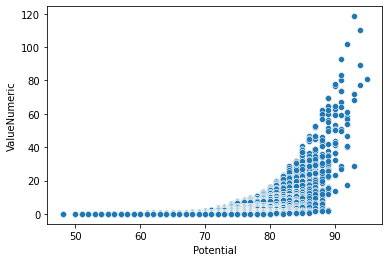

In [21]:
sns.scatterplot(fifa2.Potential, fifa2.ValueNumeric)

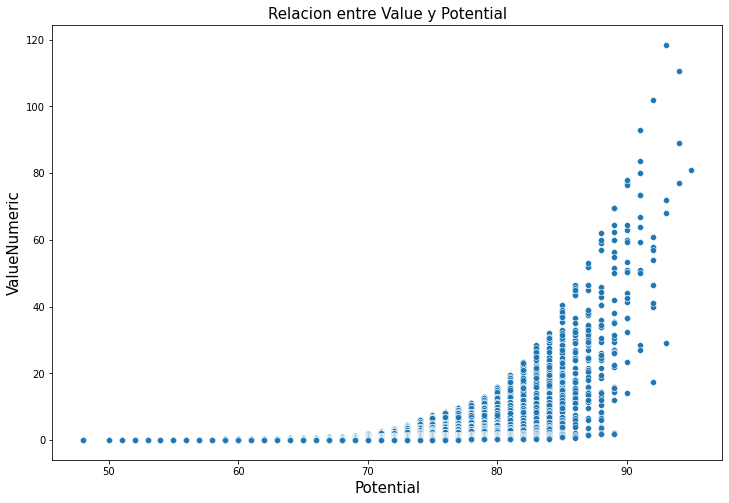

In [22]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

sns.scatterplot(data = fifa2, x = "Potential", y = "ValueNumeric")
plt.title('Relacion entre Value y Potential', fontsize=15)
plt.xlabel('Potential', fontsize=15);
plt.ylabel('ValueNumeric', fontsize=15);

plt.show();